In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/MlMediumTrainingData.csv')

In [ ]:
df.head()

,x_,y_,class
0,13.056302,-0.059154,0
1,13.261382,-0.080945,0
2,13.118969,0.408401,0
3,13.052276,0.368701,0
4,12.999014,0.557632,0


In [ ]:
df.shape

(2037, 3)

In [ ]:
df.describe()

,x_,y_,class
count,2037.000000,2037.000000,2037.000000
mean,0.020281,0.003984,-0.003927
std,11.453799,15.449651,0.062561
min,-26.010435,-34.938739,-1.000000
25%,-7.853199,-11.893604,0.000000
50%,-0.000049,0.036327,0.000000
75%,7.982745,11.833751,0.000000
max,26.010435,34.938739,0.000000


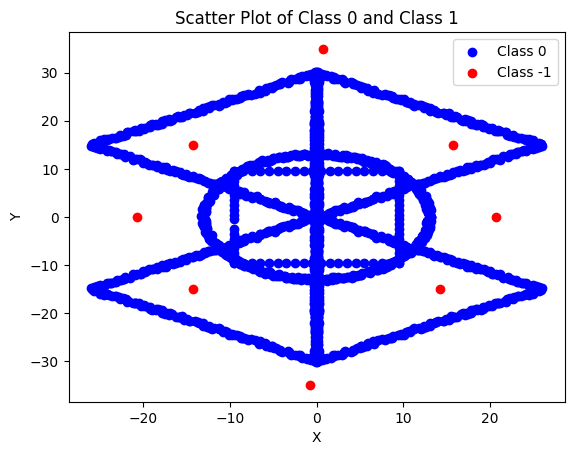

In [ ]:
import matplotlib.pyplot as plt
class_0_data = df[df['class'] == 0]
class_1_data = df[df['class'] == -1]

# Plotting
plt.scatter(class_0_data['x_'], class_0_data['y_'], color='blue', label='Class 0')
plt.scatter(class_1_data['x_'], class_1_data['y_'], color='red', label='Class -1')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Class 0 and Class 1')
plt.legend()
plt.show()

In [ ]:

df['class'].value_counts()[0]


2029

In [ ]:
df['class'].value_counts()[-1]


8

<Axes: xlabel='x_', ylabel='Density'>

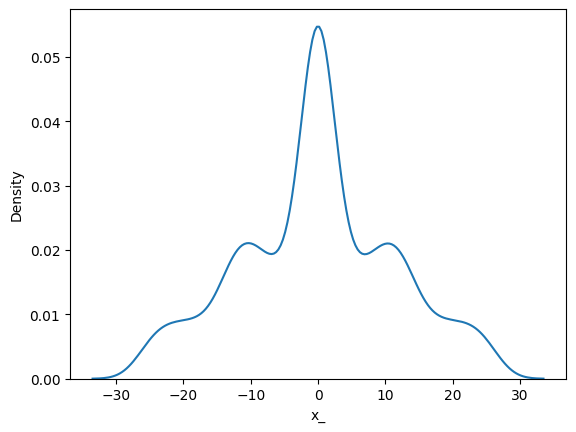

In [ ]:
sns.kdeplot(df['x_'])

<Axes: xlabel='y_', ylabel='Density'>

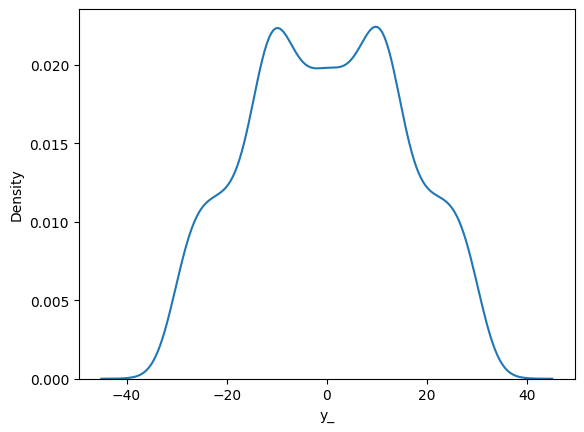

In [ ]:
sns.kdeplot(df['y_'])

In [ ]:
# df['class'] = df['class'].astype('category')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X = df.drop(columns=['class'])
y= df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X, y= oversampler.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import numpy as np
np.count_nonzero(y_train== 1)

0

In [ ]:
X_train

,x_,y_
187,-9.206663,9.359672
2225,20.739484,-0.061261
2341,-14.260516,-15.061261
2711,14.260516,-14.938739
1936,20.241693,11.775877
...,...,...
1130,14.970497,-21.299436
1294,1.800890,-1.034434
860,-17.279419,9.781238
3507,0.739484,34.938739


In [ ]:
y_train

187     0
2225   -1
2341   -1
2711   -1
1936    0
       ..
1130    0
1294    0
860     0
3507   -1
3174   -1
Name: class, Length: 2840, dtype: int64

In [ ]:
from sklearn.metrics import classification_report
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Example prediction
new_point = [[0, 0]]  # Coordinates of a new point
predicted_label = clf.predict(new_point)
print(f"Predicted label: {predicted_label}")
print(classification_report(y_test, y_pred))



Accuracy: 1.0
Predicted label: [0]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       587
           0       1.00      1.00      1.00       631

    accuracy                           1.00      1218
   macro avg       1.00      1.00      1.00      1218
weighted avg       1.00      1.00      1.00      1218


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# prompt: replace every -1 in y_train and y_test with 1

import numpy as np
y_train = np.where(y_train == -1, 1, y_train)
y_test = np.where(y_test == -1, 1, y_test)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")

y_pred = xgb_model.predict(X_test)

# Example prediction
new_point = [[0, 0]]
predicted_label = xgb_model.predict(new_point)
print(f"Predicted label: {predicted_label}")
print(classification_report(y_test, y_pred))

XGBoost Accuracy: 0.9975369458128078
Predicted label: [0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       631
           1       0.99      1.00      1.00       587

    accuracy                           1.00      1218
   macro avg       1.00      1.00      1.00      1218
weighted avg       1.00      1.00      1.00      1218


In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")
y_pred = dt_model.predict(X_test)


# Example prediction
new_point = [[0, 0]]  # Coordinates of a new point
predicted_label = dt_model.predict(new_point)
print(f"Predicted label: {predicted_label}")
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.9983579638752053
Predicted label: [0]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       631
           1       1.00      1.00      1.00       587

    accuracy                           1.00      1218
   macro avg       1.00      1.00      1.00      1218
weighted avg       1.00      1.00      1.00      1218


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
base_classifier = DecisionTreeClassifier(random_state=42)

# Create the BalancedBaggingClassifier
bbc = BalancedBaggingClassifier(base_estimator=base_classifier, n_estimators=10, random_state=42)

# Fit the model
bbc.fit(X_train, y_train)

# Make predictions
y_pred = bbc.predict(X_test)
# Example prediction
new_point = [[0, 0]]  # Coordinates of a new point
predicted_label = bbc.predict(new_point)
# Print the accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9983579638752053

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       631
           1       1.00      1.00      1.00       587

    accuracy                           1.00      1218
   macro avg       1.00      1.00      1.00      1218
weighted avg       1.00      1.00      1.00      1218


/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BalancedBaggingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
predicted_label

array([0])